### 数据集

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#用于数据集分类
from sklearn.model_selection import train_test_split
#生成 分类的数据集
from sklearn.datasets import make_classification

In [4]:

# - n_samples : 生成的样本数量。
# - n_features : 每个样本的特征数量。
# - n_redundant : 指定生成的特征中与其他特征线性相关的 冗余特征数量。
# - n_classes : 数据集中的类别数量。
# - n_clusters_per_class : 每个类中的簇数量，用于生成样本。
# - random_state : 随机数种子，用于控制数据集的随机性以便结果可重现。
x, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=1024
)

In [5]:
#x 数据集，有两个特征值  也就是有一个数组有两个参数
#y 类别集
x.shape,y.shape

((200, 2), (200,))

In [6]:
#stratify=y =>
#stratify=y 是 make_classification 函数中的一个参数设置。当将 stratify 参数设置为 y 时，
#它可以确保生成的样本在指定的类别 y 中保持均衡分布。这有助于在生成的数据集中保持类别的平衡分布

x_train, x_test ,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 233,stratify=y)

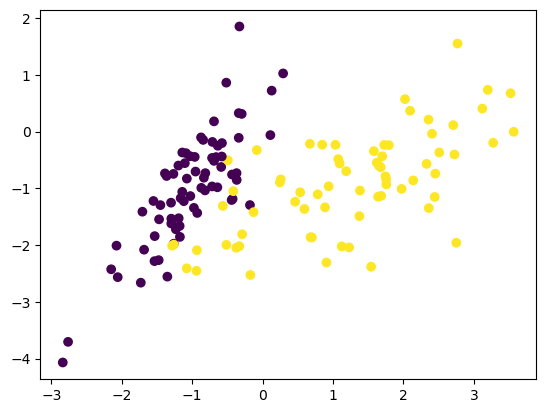

In [7]:
#用x 的第一个特征值 作为 x 第二个特征值作为y  用设置类别的颜色
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

### sklearn中的逻辑回归

In [8]:
#逻辑回归用于二分类，不是0/1，遇到的问题是，x的范围是正无穷和负无穷，p的范围是0-1，我们需要把x的范围进行调整，而且将分散的p点(0.6/0.1)归类为 0/1
from sklearn.linear_model import LogisticRegression


In [9]:
clf = LogisticRegression()
#初始化分类器
clf.fit(x_train, y_train)

LogisticRegression()

In [10]:
#训练集
clf.score(x_train, y_train)

0.9357142857142857

In [11]:
#测试集
clf.score(x_test, y_test)

0.95

In [12]:
clf.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [13]:
#每个样本对应的分类的概率  有两个分类所以有两个数值
clf.predict_proba(x_test)

array([[6.21458472e-05, 9.99937854e-01],
       [9.70483101e-01, 2.95168992e-02],
       [1.53542503e-02, 9.84645750e-01],
       [9.66871922e-01, 3.31280775e-02],
       [7.10484282e-02, 9.28951572e-01],
       [1.05085121e-01, 8.94914879e-01],
       [6.94750254e-03, 9.93052497e-01],
       [2.85079491e-02, 9.71492051e-01],
       [2.31134964e-02, 9.76886504e-01],
       [8.18101271e-01, 1.81898729e-01],
       [8.03390346e-03, 9.91966097e-01],
       [1.05450913e-01, 8.94549087e-01],
       [9.65238966e-01, 3.47610337e-02],
       [9.03576752e-01, 9.64232483e-02],
       [8.57617714e-01, 1.42382286e-01],
       [8.62005902e-01, 1.37994098e-01],
       [8.17973152e-01, 1.82026848e-01],
       [9.93929683e-03, 9.90060703e-01],
       [9.58054865e-01, 4.19451354e-02],
       [9.22834890e-01, 7.71651102e-02],
       [7.92488905e-01, 2.07511095e-01],
       [1.59411627e-01, 8.40588373e-01],
       [5.18463889e-01, 4.81536111e-01],
       [9.06929258e-01, 9.30707417e-02],
       [2.519298

In [14]:
#横向比对 np.argmax 里面的最大值的索引值
np.argmax(clf.predict_proba(x_test), axis = 1)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

### 超参数

In [15]:
#导入网格搜索
from sklearn.model_selection import GridSearchCV

In [16]:
#penalty 损失函数的正则项
#l2 均值为0的高斯分布
#l1  均值为0 的拉普拉斯分布
#elasticnet l1 l2混合的 

#C  = > 正则项的倒数 =>C越大，正则化越弱
#正则化就是 筛选掉一些极端数据

#liblinear 只支持 l1 l2正则化
#lbfgs 只支持 l2 none
#saga 支持 l1 l2 elasticnet none

params = [{
    'penalty': ['l2', 'l1'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear']
}, {
    'penalty': ['none'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs']
}, {
    'penalty': ['elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'solver': ['saga'],
    'max_iter': [200]
}]

In [17]:
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    n_jobs=-1
)

In [18]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['none'], 'solver': ['lbfgs']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [200], 'penalty': ['elasticnet'],
                          'solver': ['saga']}])

In [19]:
grid.best_score_

0.95

In [20]:
grid.best_estimator_.score(x_test, y_test)

0.9333333333333333

In [21]:
grid.best_params_

{'C': 1,
 'l1_ratio': 0.75,
 'max_iter': 200,
 'penalty': 'elasticnet',
 'solver': 'saga'}